In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [60]:
customer = pd.read_csv('Customer Acqusition.csv',usecols=['Customer','Age','City','Product','Limit','Company','Segment'])
repay = pd.read_csv('Repayment.csv',usecols = ['Customer','Month','Amount'])
spend = pd.read_csv('spend.csv',usecols=['Customer','Month','Type','Amount'])

In [61]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


# a. In case age is less than 18, replace it with mean of age values.

In [62]:
mean_orignal= customer['Age'].mean()
mean_orignal

46.49

In [63]:
customer.loc[customer['Age']<18,['Age']]=customer['Age'].mean()

In [64]:
mean_new=customer['Age'].mean()
mean_new

48.399399999999986

In [65]:
customer.loc[customer['Age']<18,['Age']]

,Age


In [86]:
customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [66]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,03-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [67]:
customer_spend = pd.merge(left=customer,right=spend,on='Customer',how='inner')

In [68]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,03-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [69]:
customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,03-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,06-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,03-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,03-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [70]:
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [71]:
customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [72]:
customer.head(1)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [73]:
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [74]:
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [75]:
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
18,A8,5-Feb-04,156913.59,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,A8,12-Jan-04,350999.98,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,A8,31-Mar-06,155642.95,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,A8,9-May-05,145457.38,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,A8,8-May-06,361184.89,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...
1494,A7,6-May-06,400375.97,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [76]:
customer_repay.loc[customer_repay['Amount']>customer_repay['Limit'],'Amount']=customer_repay['Limit']

In [77]:
customer_repay[customer_repay['Amount']>customer_repay['Limit']]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


# 2. From the above dataset create the following summaries:

# a. How many distinct customers exist?

In [15]:
distinct_customers = customer['Customer'].nunique()
distinct_customers

100

# b. How many distinct categories exist?

In [16]:
customer['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64

# c. What is the average monthly spend by customers?

In [35]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [36]:
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [45]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [38]:
customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)

In [39]:
customer_spend_group

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.33
       September  158520.09

# d. What is the average monthly repayment by customers?

In [3]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [40]:
repay['Month']=pd.to_datetime(repay['Month'])

In [48]:
repay.dropna(axis=0,inplace=True)

In [49]:
repay.info('Month')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [50]:
repay['Monthly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Yearly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [51]:
customer_repay_group= round(repay.groupby(['Yearly','Monthly']).mean(),2)

In [52]:
customer_repay_group

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [94]:
customer_spend_repay = pd.merge(left=customer_spend,right=customer_repay,on='Customer',how='inner')

In [95]:
customer_spend_repay.head()

,Customer,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,Month_x,Type,Amount_x,Month_y,Amount_y,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [97]:
customer_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [98]:
customer_spend_repay.head()

,Customer,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [110]:
customer_spend_repay['year'] = pd.DatetimeIndex(customer_spend_repay['Month_x']).year
customer_spend_repay['month'] = pd.DatetimeIndex(customer_spend_repay['Month_y']).month

In [112]:
customer_spend_repay.head(4)

,Customer,Age_x,City_x,Product_x,Limit_x,Company_x,Segment_x,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y,year,month
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1


In [115]:
interest_group = customer_spend_repay.groupby(["year","month"])['Spend_Amount','Repay_Amount'].sum()

<ipython-input-115-3c1021e1f747>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["year","month"])['Spend_Amount','Repay_Amount'].sum()


In [116]:
interest_group

Spend_Amount  Repay_Amount
year month                            
2004 1      3.449943e+08  3.770900e+08
     2      2.264325e+08  2.494853e+08
     3      2.027501e+08  2.106351e+08
     4      1.458047e+08  1.747060e+08
     5      2.988862e+08  3.511106e+08
     6      4.464237e+07  4.075062e+07
     7      4.995307e+07  5.837508e+07
     8      5.221757e+07  5.797457e+07
     9      3.835346e+07  3.859286e+07
     10     2.345379e+07  2.781902e+07
     11     8.777111e+07  9.017096e+07
     12     2.450995e+07  3.266935e+07
2005 1      4.944650e+08  5.091479e+08
     2      3.204290e+08  3.655789e+08
     3      3.027504e+08  3.045404e+08
     4      2.078596e+08  2.496983e+08
     5      4.266718e+08  4.887267e+08
     6      6.974279e+07  6.289530e+07
     7      7.316820e+07  8.644385e+07
     8      7.694553e+07  7.849968e+07
     9      5.264841e+07  5.386312e+07
     10     3.115667e+07  4.015975e+07
     11     1.268434e+08  1.248760e+08
     12     3.463230e+07  4.535234e+07
2006 1      4.325865e+08  4.645175e+08
     2      2.838177e+08  3.194462e+08
     3      2.898266e+08  2.924059e+08
     4      1.824236e+08  2.371838e+08
     5      4.071449e+08  4.742149e+08
     6      5.603790e+07  5.028689e+07
     7      6.124458e+07  7.335384e+07
     8      6.547324e+07  7.268084e+07
     9      4.635323e+07  4.840994e+07
     10     2.965770e+07  3.773292e+07
     11     1.061431e+08  1.176672e+08
     12     3.019635e+07  3.825848e+07

In [117]:
interest_group['Monthly Profit'] = interest_group['Repay_Amount'] - interest_group['Spend_Amount']

In [118]:
interest_group

Spend_Amount  Repay_Amount  Monthly Profit
year month                                            
2004 1      3.449943e+08  3.770900e+08    3.209572e+07
     2      2.264325e+08  2.494853e+08    2.305287e+07
     3      2.027501e+08  2.106351e+08    7.885033e+06
     4      1.458047e+08  1.747060e+08    2.890127e+07
     5      2.988862e+08  3.511106e+08    5.222446e+07
     6      4.464237e+07  4.075062e+07   -3.891744e+06
     7      4.995307e+07  5.837508e+07    8.422006e+06
     8      5.221757e+07  5.797457e+07    5.757004e+06
     9      3.835346e+07  3.859286e+07    2.393960e+05
     10     2.345379e+07  2.781902e+07    4.365228e+06
     11     8.777111e+07  9.017096e+07    2.399851e+06
     12     2.450995e+07  3.266935e+07    8.159398e+06
2005 1      4.944650e+08  5.091479e+08    1.468292e+07
     2      3.204290e+08  3.655789e+08    4.514989e+07
     3      3.027504e+08  3.045404e+08    1.789954e+06
     4      2.078596e+08  2.496983e+08    4.183870e+07
     5      4.266718e+08  4.887267e+08    6.205482e+07
     6      6.974279e+07  6.289530e+07   -6.847497e+06
     7      7.316820e+07  8.644385e+07    1.327565e+07
     8      7.694553e+07  7.849968e+07    1.554148e+06
     9      5.264841e+07  5.386312e+07    1.214717e+06
     10     3.115667e+07  4.015975e+07    9.003080e+06
     11     1.268434e+08  1.248760e+08   -1.967386e+06
     12     3.463230e+07  4.535234e+07    1.072004e+07
2006 1      4.325865e+08  4.645175e+08    3.193097e+07
     2      2.838177e+08  3.194462e+08    3.562852e+07
     3      2.898266e+08  2.924059e+08    2.579278e+06
     4      1.824236e+08  2.371838e+08    5.476017e+07
     5      4.071449e+08  4.742149e+08    6.706999e+07
     6      5.603790e+07  5.028689e+07   -5.751004e+06
     7      6.124458e+07  7.335384e+07    1.210926e+07
     8      6.547324e+07  7.268084e+07    7.207598e+06
     9      4.635323e+07  4.840994e+07    2.056719e+06
     10     2.965770e+07  3.773292e+07    8.075224e+06
     11     1.061431e+08  1.176672e+08    1.152411e+07
     12     3.019635e+07  3.825848e+07    8.062136e+06

In [119]:
interest_group['Interest Earned'] = (2.9* interest_group['Monthly Profit'])/100

In [120]:
interest_group

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
year month                                                             
2004 1      3.449943e+08  3.770900e+08    3.209572e+07     9.307758e+05
     2      2.264325e+08  2.494853e+08    2.305287e+07     6.685331e+05
     3      2.027501e+08  2.106351e+08    7.885033e+06     2.286660e+05
     4      1.458047e+08  1.747060e+08    2.890127e+07     8.381368e+05
     5      2.988862e+08  3.511106e+08    5.222446e+07     1.514509e+06
     6      4.464237e+07  4.075062e+07   -3.891744e+06    -1.128606e+05
     7      4.995307e+07  5.837508e+07    8.422006e+06     2.442382e+05
     8      5.221757e+07  5.797457e+07    5.757004e+06     1.669531e+05
     9      3.835346e+07  3.859286e+07    2.393960e+05     6.942483e+03
     10     2.345379e+07  2.781902e+07    4.365228e+06     1.265916e+05
     11     8.777111e+07  9.017096e+07    2.399851e+06     6.959568e+04
     12     2.450995e+07  3.266935e+07    8.159398e+06     2.366225e+05
2005 1      4.944650e+08  5.091479e+08    1.468292e+07     4.258046e+05
     2      3.204290e+08  3.655789e+08    4.514989e+07     1.309347e+06
     3      3.027504e+08  3.045404e+08    1.789954e+06     5.190866e+04
     4      2.078596e+08  2.496983e+08    4.183870e+07     1.213322e+06
     5      4.266718e+08  4.887267e+08    6.205482e+07     1.799590e+06
     6      6.974279e+07  6.289530e+07   -6.847497e+06    -1.985774e+05
     7      7.316820e+07  8.644385e+07    1.327565e+07     3.849938e+05
     8      7.694553e+07  7.849968e+07    1.554148e+06     4.507028e+04
     9      5.264841e+07  5.386312e+07    1.214717e+06     3.522679e+04
     10     3.115667e+07  4.015975e+07    9.003080e+06     2.610893e+05
     11     1.268434e+08  1.248760e+08   -1.967386e+06    -5.705418e+04
     12     3.463230e+07  4.535234e+07    1.072004e+07     3.108811e+05
2006 1      4.325865e+08  4.645175e+08    3.193097e+07     9.259982e+05
     2      2.838177e+08  3.194462e+08    3.562852e+07     1.033227e+06
     3      2.898266e+08  2.924059e+08    2.579278e+06     7.479907e+04
     4      1.824236e+08  2.371838e+08    5.476017e+07     1.588045e+06
     5      4.071449e+08  4.742149e+08    6.706999e+07     1.945030e+06
     6      5.603790e+07  5.028689e+07   -5.751004e+06    -1.667791e+05
     7      6.124458e+07  7.335384e+07    1.210926e+07     3.511684e+05
     8      6.547324e+07  7.268084e+07    7.207598e+06     2.090203e+05
     9      4.635323e+07  4.840994e+07    2.056719e+06     5.964486e+04
     10     2.965770e+07  3.773292e+07    8.075224e+06     2.341815e+05
     11     1.061431e+08  1.176672e+08    1.152411e+07     3.341993e+05
     12     3.019635e+07  3.825848e+07    8.062136e+06     2.338019e+05

# f. What are the top 5 product types?

In [121]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,03-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [122]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

# g. Which city is having maximum spend?

In [123]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

In [124]:
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

In [127]:
print('COCHIN having maximum spend')

COCHIN having maximum spend


# h. Which age group is spending more money?

In [129]:
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [131]:
age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

# i. Who are the top 10 customers in terms of repayment?

In [132]:
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [133]:
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])

In [134]:
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [135]:
customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

In [136]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

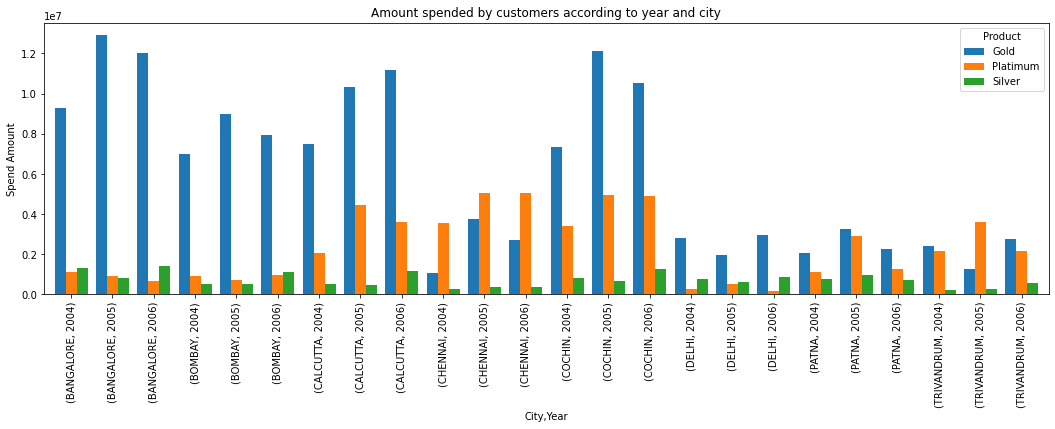

In [137]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

# 4. Create graphs for

# a. Monthly comparison of total spends, city wise

In [139]:
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [140]:
month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [141]:
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

In [142]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


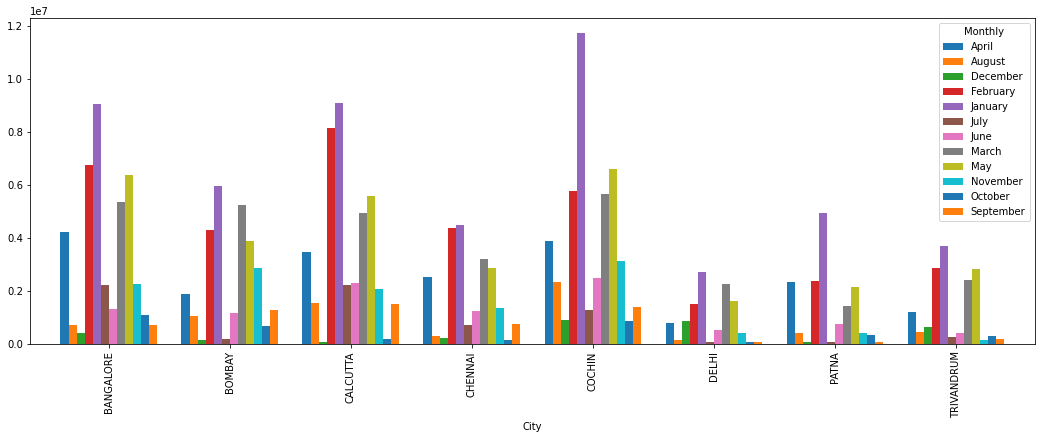

In [143]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

# b. Comparison of yearly spend on air tickets

In [144]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [146]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


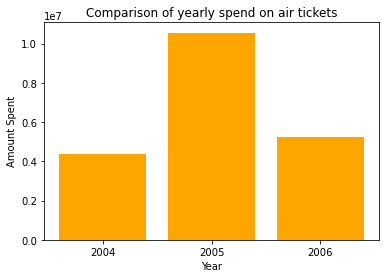

In [147]:
plt.bar(filtered["Year"],height=filtered["Amount"],color="orange")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [149]:
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


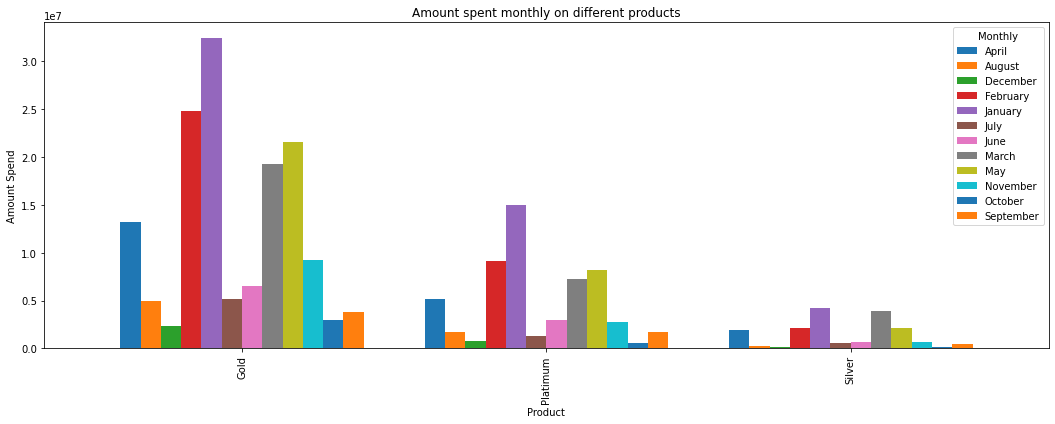

In [150]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis: